## Data Mining and Machine Learning
### k-nn Classification
#### Edgar Acuna 
#### Marzo 2020

In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Example 1. Predicting the final grade in a course based on   Ex1 and  Ex2 scores

In [98]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")

In [99]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
#Tambien se puede usar y.as_matrix() para la clasificacion
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()

In [100]:
#Applying knn with k=3 and finding the accuracy
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X1, y1) 
neigh.score(X1, y1)

1.0

In [101]:
#Finding the predictions
pred=neigh.predict(X1)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [102]:
print(y1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [103]:
#Finding the number of errors
error=(y1!=pred).sum()
print("This is the number of errors=", error)

This is the number of errors= 0


[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


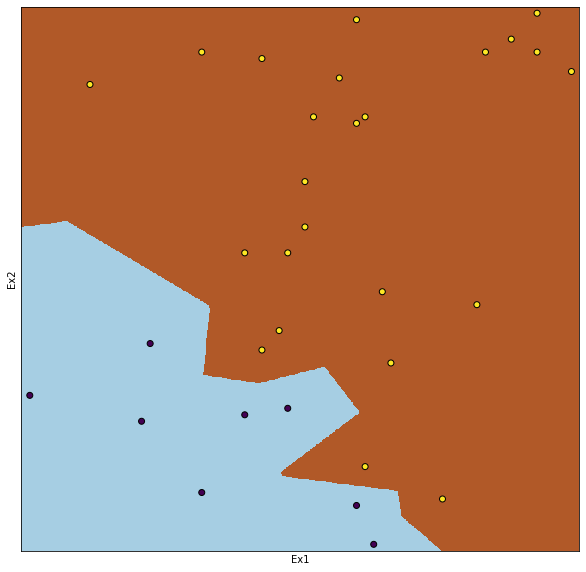

In [104]:
#Visualizing the decision boundary with k=1
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=neigh.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
print(pred2)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

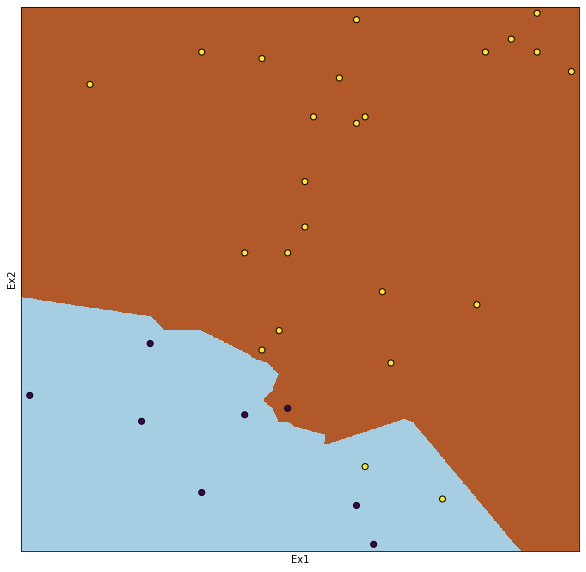

In [105]:
#Visualizing the decision boundary with k=7
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=neigh.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Example 2. K-nn applied to  Diabetes

In [106]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [107]:
y=data['class']
X=data.iloc[:,0:8]
y1=y.as_matrix()
X1=X.as_matrix()

In [108]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3,random_state=0)
X_train, y_train

X_test, y_test

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [109]:
pred=neigh.predict(X_test)
(pred==1).sum()

160

In [110]:
(pred==2).sum()

71

In [111]:
#The confusion matrix
confusion_matrix(y_test,pred)

array([[123,  34],
       [ 37,  37]], dtype=int64)

In [112]:
neigh.score(X_test, y_test)

0.6926406926406926

In [113]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.77      0.78      0.78       157
           2       0.52      0.50      0.51        74

    accuracy                           0.69       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.69      0.69      0.69       231



Precision is the ratio tp / (tp + fp) where tp=168 is the number of true positives and fp=53 is the number of false positives. It measures the cspsbility of the classifier to do not label as positives intances that have negative as label. 

Recall or sensitivity is the ratio tp / (tp + fn) where y fp=37 is the number of false negatives. It measures the capability of the classifier to find all the positive instancias.

The f1-score is the harmonic mean of the precision and recall.

In [114]:
#Estimacion de la precision usando k=5 vecinos usando validacion cruzada
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, X1, y1, cv=10)
scores

array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
       0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.75      ])

In [115]:
print("Accuracy using k=5 neighbors: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using k=5 neighbors: 0.72 (+/- 0.09)


### Ejemplo 3. Dataset Landsat visualizando con Componentes principales

In [116]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
y1=y.as_matrix()
X1=X.as_matrix()

In [117]:
#Estimacion de la precision con k=3 vecinos  por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3, random_state=0)
X_train, y_train

X_test, y_test

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [118]:
pred=neigh.predict(X_test)

In [119]:
neigh.score(X_test, y_test)

0.9030803906836965

In [120]:
print(confusion_matrix(y_test, pred))

[[321   0   5   2   2   0]
 [  0 146   0   2   0   2]
 [  1   0 267  14   0   5]
 [  0   2  23  72   1  17]
 [  3   1   0   5 114   8]
 [  0   1   5  23   7 282]]


In [121]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       330
           2       0.97      0.97      0.97       150
           3       0.89      0.93      0.91       287
           4       0.61      0.63      0.62       115
           5       0.92      0.87      0.89       131
           6       0.90      0.89      0.89       318

    accuracy                           0.90      1331
   macro avg       0.88      0.88      0.88      1331
weighted avg       0.90      0.90      0.90      1331



In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[16.48810712 14.08354844]
[0.45789971 0.39112147]
[0.45789971 0.84902117]


In [123]:
#Aplicando el clasificador knn con k=9 y calculando el porcentaje de precision
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(principalComponents, y1) 
pcaDF['class']=y
finalDf=pcaDF
#Tasa de precision
ypred=neigh.predict(principalComponents)
precision=(y==ypred).sum()/float(len(y))
print("Este la precision con dos PC=", precision)

Este la precision con dos PC= 0.8622322435174746


### Visualizando las regiones definidas por los vecinos mas cercanos y los data points proyectados en las dos componentes primcipales

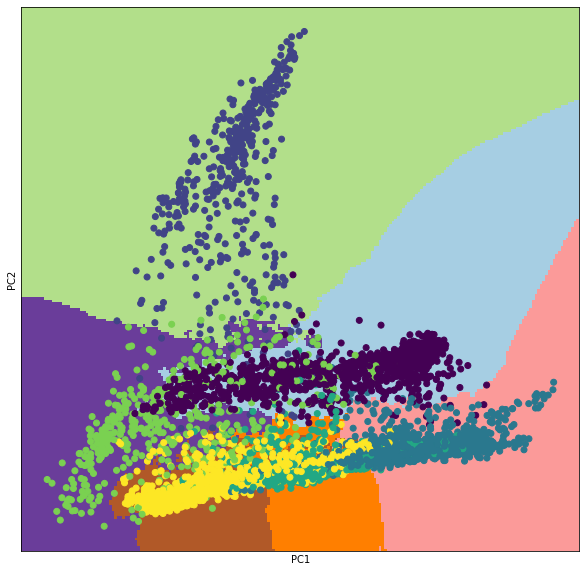

In [124]:
from matplotlib.colors import ListedColormap
eje1=np.arange(start = finalDf['PC1'].min()-1, stop = finalDf['PC1'].max() + 1, step = 0.1)
eje2=np.arange(start = finalDf['PC2'].min()-1, stop = finalDf['PC2'].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=neigh.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()
































































































































































































### Visualizando los data points proyectados en las primeras dos componentes primcipales de t-SNE

Landsat, perplexity=5 in 62 sec
Landsat, perplexity=20 in 71 sec
Landsat, perplexity=30 in 3.3e+03 sec
Landsat, perplexity=40 in 33 sec
Landsat, perplexity=50 in 36 sec


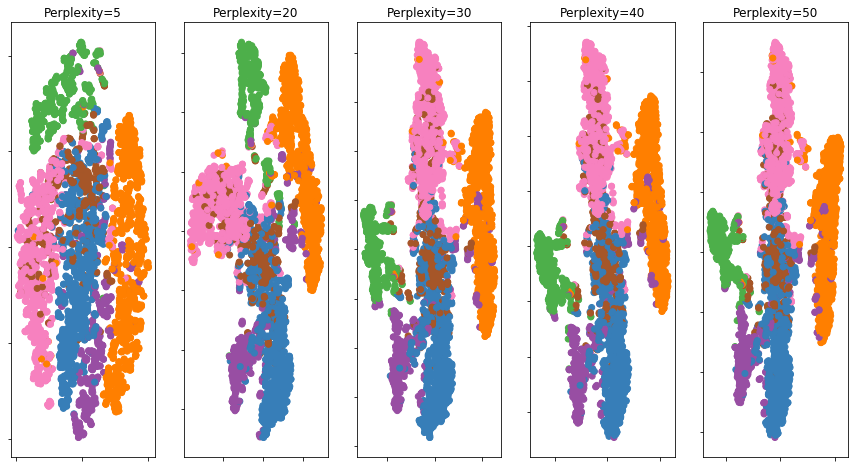

In [125]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 8),squeeze=False)
perplexities = [5, 20, 30, 40,50]

#colors=y
from matplotlib.colors import ListedColormap
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3']), int(max(y)+1))))
#print(colors)
for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X1)
    t1 = time()
    print("Landsat, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:,1], c=colors[y])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()
